In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
%matplotlib notebook

In [3]:
im = cv2.imread("img3-min.jpg")
im = cv2.resize(im, (500, 540))

<IPython.core.display.Javascript object>


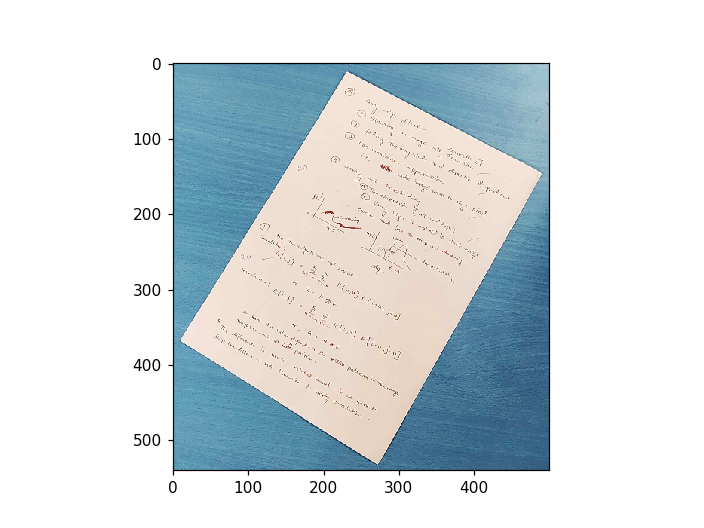

In [4]:
#plt.figure(figsize=(12,12))
plt.imshow(im)

In [5]:
#four corners of the book in the image are foung by hovering above the image in matplotlib notebook mode

pts_book = np.array([[228,8], [492, 147], [7,368], [270,533]])

#general aspect ratio of books are 3:4 for so we choose the size (300, 400)

pts_correct = np.array([[0, 0], [299, 0],[0, 399], [299, 399]])

#calculate homography from book image to size(300, 400)

homographyMat, status = cv2.findHomography(pts_book, pts_correct)

#warp book for perspective correction (300, 400)

result = cv2.warpPerspective(im, homographyMat, (300, 400))

Text(0.5, 1.0, 'The scanned (adjusted) document')

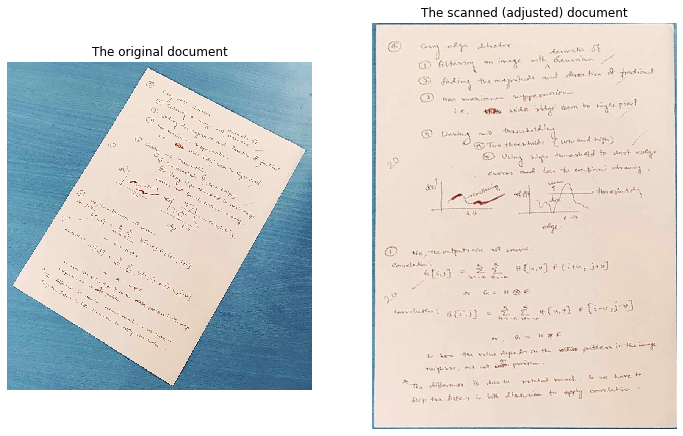

In [7]:
%matplotlib inline
fig = plt.figure(figsize=(12,12))

plt.subplot(121)
plt.imshow(im)
plt.axis('off')
plt.title('The original document')

plt.subplot(122)
plt.imshow(result)
plt.axis('off')
plt.title('The scanned (adjusted) document')